In [1]:
from geomdl import NURBS
from geomdl.visualization import VisMPL
import numpy as np
from geomdl import multi

In [2]:
def construct_arc_test(alpha, z=0, r=1, show=False):
    """
    Function forms a Nurbs circle of fraction 'alpha' about the z-axis at a height of 'z' with radius 'r'
    'show=True' renders the curve, along with a full circle to show the two coincide
    Returns the weighted control points and the knot vector 
    """
    
    #Constructs a full circle
    crv1 = NURBS.Curve()
    crv1.degree = 2
    crv1.ctrlptsw = [[1, 0, 0, 1], [0.707, 0.707, 0, 0.707], [0, 1, 0, 1], [-0.707, 0.707, 0, 0.707], [-1, 0, 0, 1], [-0.707, -0.707, 0, 0.707], [0, -1, 0 , 1], [0.707, -0.707, 0, 0.707], [1, 0, 0, 1]]
    crv1.knotvector = [0, 0, 0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1, 1, 1]
    
    if alpha > 1 or alpha <= 0:
        #Only a fraction of a circle can be drawn, therefore 0 < alpha <= 1
        raise Exception('alpha must be strictly greater than 0 and equal to or less than 1')
    elif r <= 0:
        #Circle must have a radius greater than 0
        raise Exception('r must be greater than 0')
    elif 0 < alpha and alpha <= 0.25:
        theta = alpha*2*np.pi
        #Set weight of odd control points
        w = np.cos(theta/2)
        #Set scalar adjustment for odd control points
        s = 1/np.cos(theta/2)
        #Draw the arc
        crv2 = NURBS.Curve()
        crv2.degree = 2
        crv2.ctrlptsw = [[r*1, r*0, z, 1], [r*w*s*np.cos(theta/2), r*w*s*np.sin(theta/2), z*w, w], [r*np.cos(theta), r*np.sin(theta), z, 1]]
        crv2.knotvector = [0, 0, 0,  1, 1, 1]
        if show == False:
            return crv2.ctrlptsw, crv2.knotvector
        elif show == True: 
            #Renders combination of arc and full circle
            mcrv = multi.CurveContainer(crv1, crv2)
            mcrv.vis = VisMPL.VisCurve2D()
            mcrv.render()
            return crv2.ctrlptsw, crv2.knotvector
    elif 0.25 < alpha and alpha <= 0.50:
        theta = alpha*2*np.pi
        w = np.cos(theta/4)
        s = 1/np.cos(theta/4)
        
        crv2 = NURBS.Curve()
        crv2.degree = 2
        crv2.ctrlptsw = [[r*1, 0, z, 1],
                        [r*w*s*np.cos(theta/4), r*w*s*np.sin(theta/4), z*w, w], 
                        [r*np.cos(theta/2), r*np.sin(theta/2), z, 1],
                        [r*w*s*np.cos(3*theta/4), r*w*s*np.sin(3*theta/4), z*w, w],
                        [r*np.cos(theta), r*np.sin(theta), z, 1]]
        crv2.knotvector = [0, 0, 0, 0.5, 0.5, 1, 1, 1]
        
        if show == False:
            return crv2.ctrlptsw, crv2.knotvector
        elif show == True: 
            mcrv = multi.CurveContainer(crv1, crv2)
            mcrv.vis = VisMPL.VisCurve2D()
            mcrv.render()
            return crv2.ctrlptsw, crv2.knotvector
    elif 0.5 < alpha and alpha <= 0.75:
        theta = alpha*2*np.pi
        w = np.cos(theta/6)
        s = 1/np.cos(theta/6)
        
        crv2 = NURBS.Curve()
        crv2.degree = 2
        crv2.ctrlptsw = [[r*1, 0, z, 1],
                        [r*w*s*np.cos(theta/6), r*w*s*np.sin(theta/6), z*w, w], 
                        [r*np.cos(theta/3), r*np.sin(theta/3), z, 1],
                        [r*w*s*np.cos(theta/2), r*w*s*np.sin(theta/2), z*w, w],
                        [r*np.cos(2*theta/3), r*np.sin(2*theta/3), z, 1],
                        [r*w*s*np.cos(5*theta/6), r*w*s*np.sin(5*theta/6), z*w, w],
                        [r*np.cos(theta), r*np.sin(theta), z, 1]]
        crv2.knotvector = [0, 0, 0, 1/3, 1/3, 2/3, 2/3, 1, 1, 1]
        if show == False:
            return crv2.ctrlptsw, crv2.knotvector
        elif show == True: 
            mcrv = multi.CurveContainer(crv1, crv2)
            mcrv.vis = VisMPL.VisCurve2D()
            mcrv.render()
            return crv2.ctrlptsw, crv2.knotvector
    elif 0.75 < alpha and alpha <= 1:
        theta = alpha*2*np.pi
        w = np.cos(theta/8)
        s = 1/np.cos(theta/8)
        
        crv2 = NURBS.Curve()
        crv2.degree = 2
        crv2.ctrlptsw = [[r*1, 0, z, 1],
                        [r*w*s*np.cos(theta/8), r*w*s*np.sin(theta/8), z*w, w], 
                        [r*np.cos(theta/4), r*np.sin(theta/4), z, 1],
                        [r*w*s*np.cos(3*theta/8), r*w*s*np.sin(3*theta/8), z*w, w],
                        [r*np.cos(theta/2), r*np.sin(theta/2), z, 1],
                        [r*w*s*np.cos(5*theta/8), r*w*s*np.sin(5*theta/8), z*w, w],
                        [r*np.cos(3*theta/4), r*np.sin(3*theta/4), z, 1],
                        [r*w*s*np.cos(7*theta/8), r*w*s*np.sin(7*theta/8), z*w, w],
                        [r*np.cos(theta), r*np.sin(theta), z, 1]]
        crv2.knotvector = [0, 0, 0, 1/4, 1/4, 2/4, 2/4, 3/4, 3/4, 1, 1, 1]
        if show == False:
            return crv2.ctrlptsw, crv2.knotvector
        elif show == True: 
            mcrv = multi.CurveContainer(crv1, crv2)
            mcrv.vis = VisMPL.VisCurve2D()
            mcrv.render()
            return crv2.ctrlptsw, crv2.knotvector

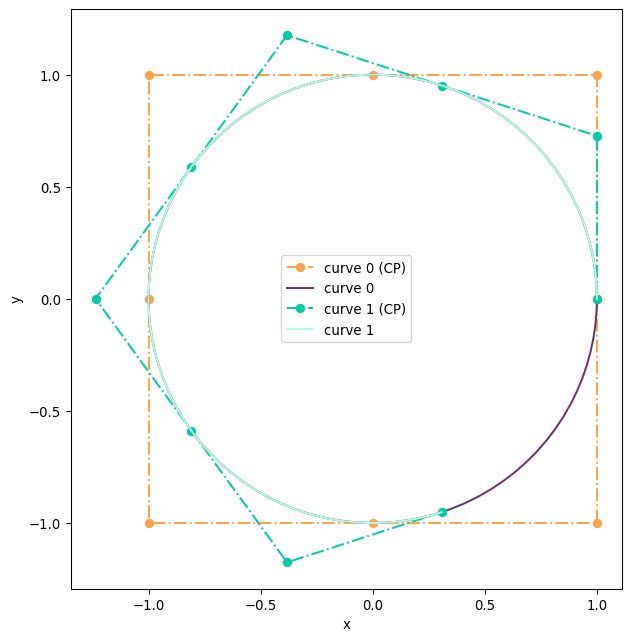

[0.0, 0.0, 0.0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1.0, 1.0, 1.0]

In [3]:
construct_arc_test(0.8, 0, 1, True)